# Doc2Vec

This works much in the same was as Word2Vec, except on input we also specify which document/filing a given word has come from, resulting in ready made document vectors for us.

In [1]:
import os
import json
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

df = pd.read_csv("../data/preprocessed.csv")

In [2]:
from gensim.models import doc2vec
from collections import namedtuple

# Load data

# doc1 = ["This is a sentence", "This is another sentence"]

# Transform data (you can add more data preprocessing steps) 

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(df["coDescription_stopwords"]):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

# Train model (set min_count = 1, if you want the model to work with the provided example data set)

model = doc2vec.Doc2Vec(docs, vector_size = 100, window = 10, min_count = 1, workers = 4)

Like Word2Vec, we now also have a document vector matrix. We specified only 100 dimensions due to computational limitations, and the fact anymore most likely would not have helped. (Tune the hyper-parameter later)

In [3]:
# Get the vectors

doc_vec_2 = pd.DataFrame([model.dv[doc] for doc in np.arange(0,len(docs))])
doc_vec_2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.089425,-0.548427,-0.506314,2.282764,0.493732,-0.044162,-0.683934,-1.093237,-1.767080,-0.031621,...,1.299969,-3.326624,-2.947230,-0.013724,0.225934,0.358640,0.436329,2.244354,-0.559948,-2.536444
1,-1.227644,-1.710288,-2.136047,0.885708,-0.301418,0.518971,-0.896363,-1.894104,-0.714949,1.388550,...,-0.826845,-1.700443,-3.137049,-0.456391,0.256117,-0.241841,-0.514118,0.782698,0.256845,-1.575706
2,-2.870420,-1.313239,-1.373746,2.130894,0.730261,0.635648,-0.377850,-2.007533,-1.959722,-0.210123,...,0.741805,-1.891292,-3.076844,0.487608,0.290185,1.533259,-2.429909,0.662054,2.131078,-3.754676
3,-1.510269,-1.106193,-0.621366,0.440758,-0.524256,-0.275234,-0.195717,-0.737576,-1.527156,0.274696,...,-1.144564,-3.340368,-1.881082,-0.704257,-0.899220,0.548470,-0.180668,0.372753,2.267369,-1.209191
4,-1.203485,-1.428279,-1.524509,1.915727,-1.620831,-0.435836,-1.111148,1.729991,-0.513859,2.655733,...,-1.863876,1.092564,-3.842854,0.940608,3.881695,2.618765,-2.095075,2.011380,-2.565893,-2.765820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,-1.852177,-0.146214,-0.418176,0.145674,2.247472,0.254654,0.222264,0.504114,-2.818157,-0.803469,...,-1.215625,-0.190623,-1.101862,-1.475254,0.563833,0.593524,0.400161,0.250734,0.210037,-0.380040
671,-2.307601,-2.143670,-0.855230,1.439271,3.814585,0.093351,-1.438607,1.753217,-1.125314,1.061169,...,-1.475635,-0.348796,-0.898385,0.375182,2.748170,3.612824,-2.875913,0.078715,-0.831172,1.217945
672,-1.374755,-1.369430,0.498136,0.924053,0.017770,-0.109725,-2.295748,-1.692411,-1.138332,3.195385,...,-0.869887,0.801670,-3.235598,-1.690749,-0.665860,0.217451,2.848663,-0.345286,-1.042001,-1.233560
673,-1.418235,1.073779,-0.431892,0.305798,1.643080,-0.809370,-0.668220,1.192367,-2.890596,-1.345025,...,-1.411378,0.701287,-0.495026,-1.748078,0.990276,-1.096012,-1.002656,-0.966912,0.735139,-0.393265


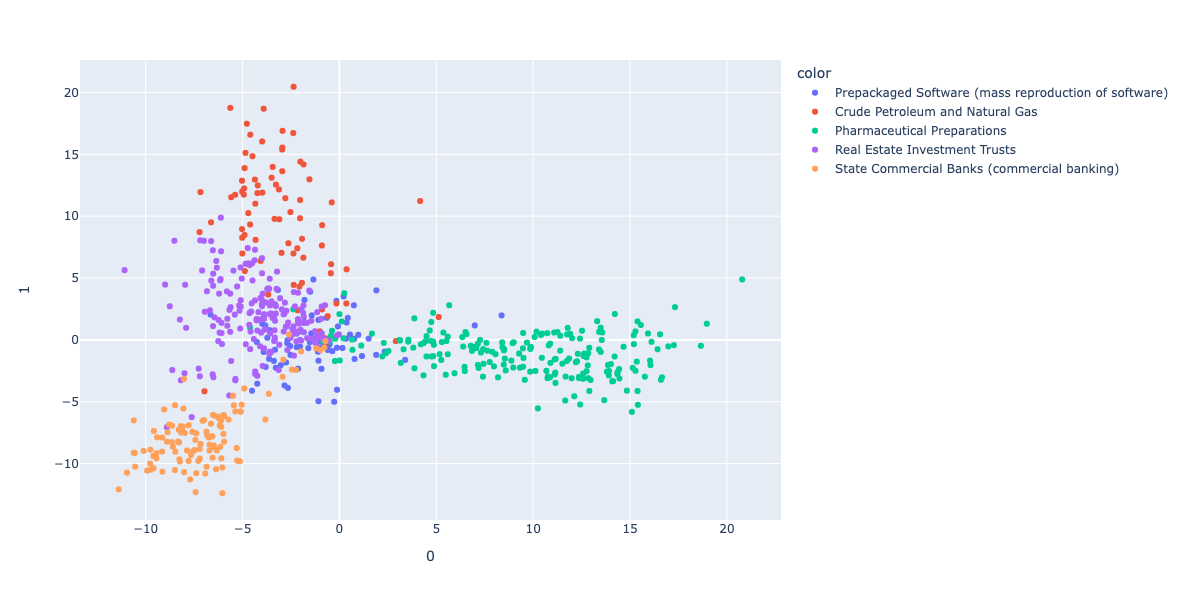

In [41]:
plot_pca = std_func.pca_visualize_2d(doc_vec_2, df.loc[:,["name","SIC_desc"]])

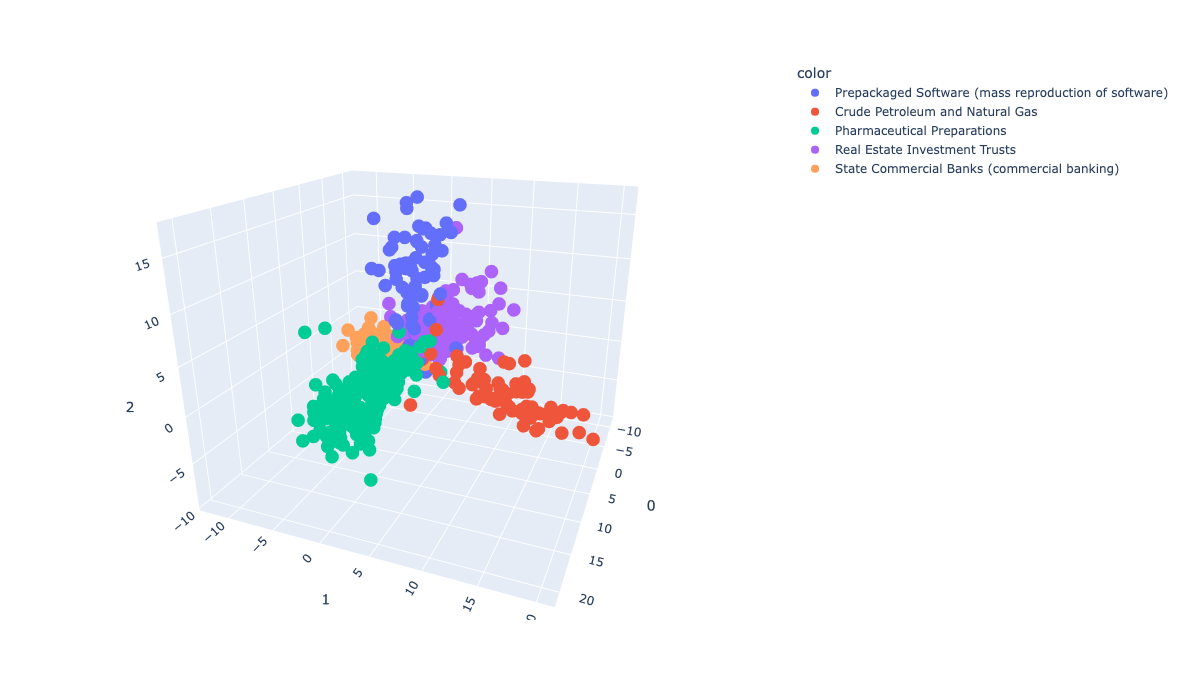

In [42]:
std_func.pca_visualize_3d(plot_pca)